In [2]:
# Importar paquetes

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import plotly.express as px
#engine = create_engine('sqlite:///C:\\Users\\Giovanni\\OneDrive\\Documents\\GitHub\\Pistas_de_aterrizaje_por_continente\\OurAirports_DataSource.sqlite')
engine = create_engine('sqlite:///C:\\Users\\sexzai\\Pistas_de_aterrizaje_por_continente\\OurAirports_DataSource.sqlite')

query = "SELECT * FROM SA_Airports;"
sa_airports = pd.read_sql_query(query, engine)
sa_airports.to_csv('SA_Airports.csv', index=False)
#Transfotmacion de variables
sa_airports['code'] = pd.Categorical(sa_airports['code'])
sa_airports['ident'] = pd.Categorical(sa_airports['ident'])
sa_airports['name'] = pd.Categorical(sa_airports['name'])
sa_airports['type'] = pd.Categorical(sa_airports['type'])
sa_airports['surface'] = pd.Categorical(sa_airports['surface'])

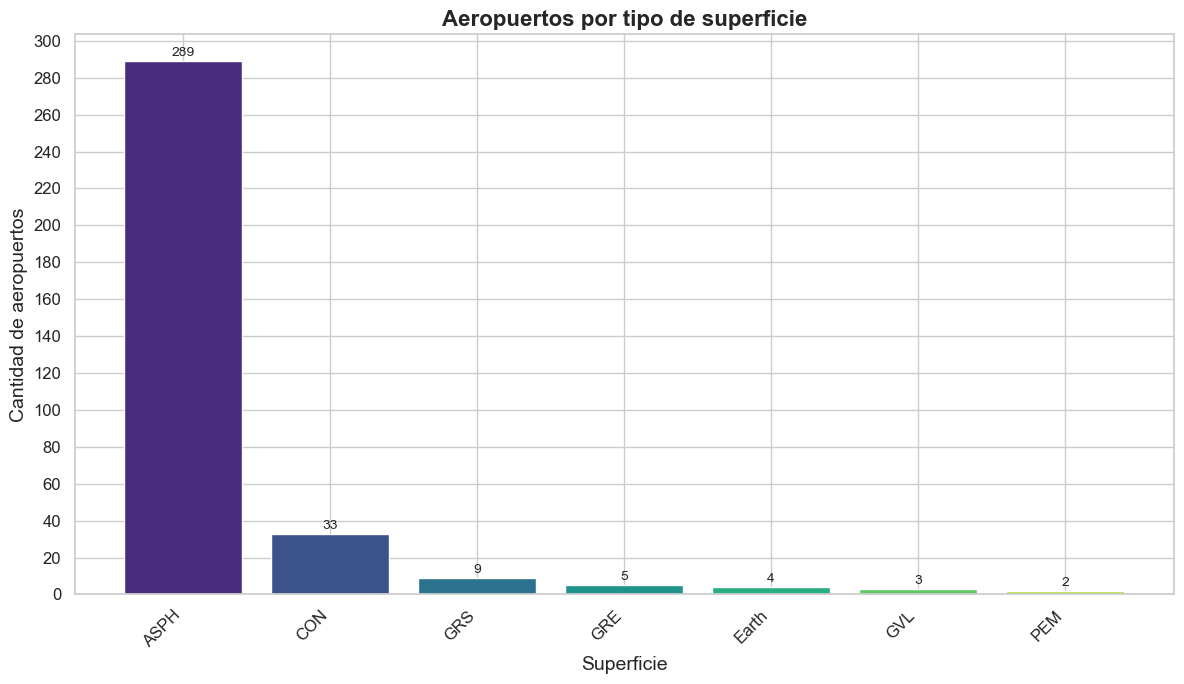

In [3]:
#Grafico de barras para superficies

superficies = sa_airports['surface'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
bars = plt.bar(superficies.index, superficies.values, color=sns.color_palette("viridis", len(superficies)))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(range(0, max(superficies.values) + 20, 20), fontsize=12)
plt.xlabel('Superficie', fontsize=14)
plt.ylabel('Cantidad de aeropuertos', fontsize=14)
plt.title('Aeropuertos por tipo de superficie', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

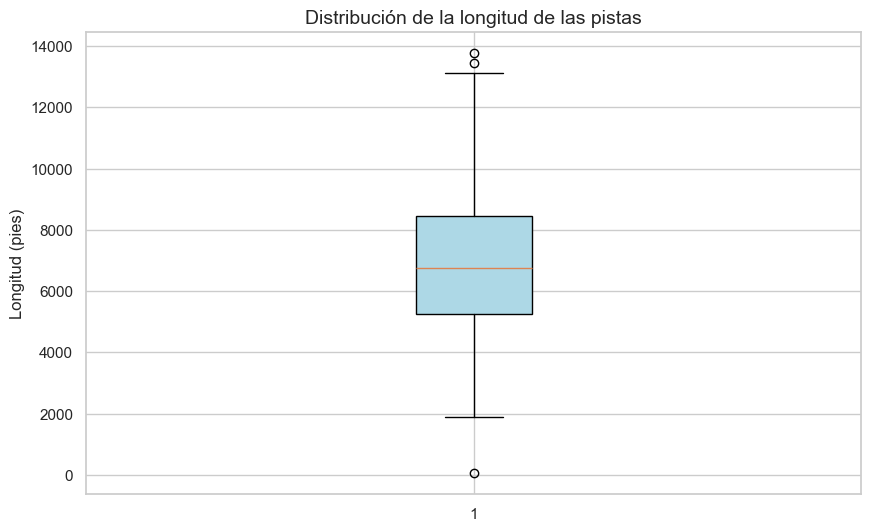

In [4]:
#Grafico de caja para longitud
plt.figure(figsize=(10, 6))
plt.boxplot(sa_airports['length_ft'], patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'))
plt.ylabel('Longitud (pies)', fontsize=12)
plt.title('Distribución de la longitud de las pistas', fontsize=14)
plt.show()

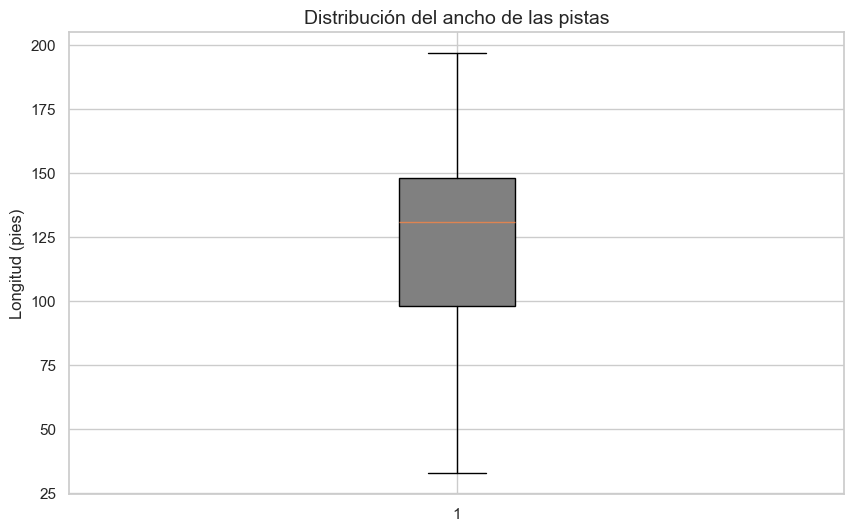

In [5]:
#Grafico de caja para ancho
plt.figure(figsize=(10, 6))
plt.boxplot(sa_airports['width_ft'], patch_artist=True, 
            boxprops=dict(facecolor='gray', color='black'))
plt.ylabel('Longitud (pies)', fontsize=12)
plt.title('Distribución del ancho de las pistas', fontsize=14)
plt.show()

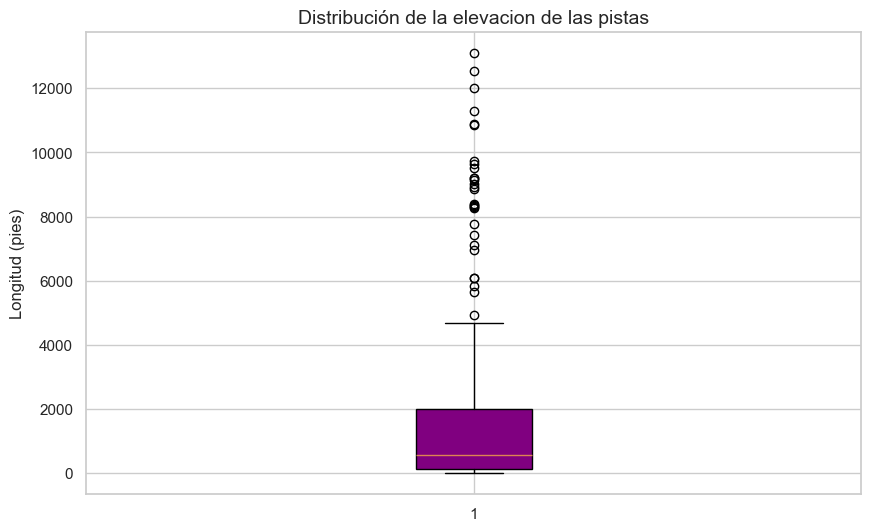

In [6]:
#Grafico de caja para elevacion
plt.figure(figsize=(10, 6))
plt.boxplot(sa_airports['le_elevation_ft'], patch_artist=True, 
            boxprops=dict(facecolor='purple', color='black'))
plt.ylabel('Longitud (pies)', fontsize=12)
plt.title('Distribución de la elevacion de las pistas', fontsize=14)
plt.show()


In [7]:
#Estadisticas descriptivas de Latinoamerica
sa_airports.describe().round(2)

,length_ft,width_ft,le_elevation_ft
count,345.00,345.00,345.00
mean,6960.77,120.57,1578.21
std,2406.86,32.19,2460.64
min,69.00,33.00,7.00
25%,5249.00,98.00,114.00
50%,6749.00,131.00,570.00
75%,8448.00,148.00,1992.00
max,13779.00,197.00,13110.00


In [8]:
#Estadisticas descriptivas por pais de latinoamerica
sa_airports.groupby('code', observed=False).agg({
    'length_ft': ['count', 'mean', 'min', 'max'],
    'width_ft': ['mean', 'min', 'max'],
    'le_elevation_ft': ['mean', 'min', 'max']
}).round(1).transpose()

code                        AR       BO       BR       CL       CO       EC  \
length_ft       count     61.0     15.0     93.0     30.0     48.0     27.0   
                mean    7457.0   8375.4   6087.5   6627.4   6502.8   6991.6   
                min     3281.0   3940.0     69.0   2625.0   2707.0   2077.0   
                max    11644.0  13123.0  13123.0  12303.0  12467.0  13445.0   
width_ft        mean     128.4    121.7    116.3    125.6    108.1    103.5   
                min       66.0     98.0     40.0     59.0     33.0     39.0   
                max      197.0    151.0    197.0    164.0    164.0    151.0   
le_elevation_ft mean     893.3   3896.4   1321.9    752.2   1796.3   2981.3   
                min        7.0    400.0     10.0     12.0      7.0      8.0   
                max     4678.0  13110.0   3497.0   7424.0   9723.0   9646.0   

code                       FK       GF      GY       PE       PY       SR  \
length_ft       count     1.0      2.0     1.0     29.0      7.0      1.0   
                mean   5003.0   6555.5  7448.0   8550.8   8095.6  11417.0   
                min    5003.0   2625.0  7448.0   3355.0   4987.0  11417.0   
                max    5003.0  10486.0  7448.0  13779.0  11483.0  11417.0   
width_ft        mean     75.0     98.5   148.0    132.5    128.0    148.0   
                min      75.0     49.0   148.0     65.0     75.0    148.0   
                max      75.0    148.0   148.0    150.0    148.0    148.0   
le_elevation_ft mean    215.0     19.5    96.0   3457.3    684.4     56.0   
                min     215.0     18.0    96.0     11.0    223.0     56.0   
                max     215.0     21.0    96.0  12552.0   1870.0     56.0   

code                       UY       VE  
length_ft       count     8.0     22.0  
                mean   4838.0   7944.0  
                min    2297.0   3937.0  
                max    7477.0  10645.0  
width_ft        mean    119.9    140.7  
                min      75.0     98.0  
                max     148.0    190.0  
le_elevation_ft mean    173.8    567.1  
                min      36.0     10.0  
                max     466.0   2145.0